In [1]:
import networkx as nx
from ensmallen_graph import EnsmallenGraph
import matplotlib.pyplot as plt

In [2]:
G = nx.gnp_random_graph(10, 0.3, seed=47)

In [3]:
positions = nx.kamada_kawai_layout(G, )

In [4]:
sources, destinations = list(zip(*G.edges()))

In [5]:
graph = EnsmallenGraph(sources, destinations, False)

In [6]:
graph.spanning_tree(0)

{(0, 7, None),
 (0, 8, None),
 (3, 1, None),
 (4, 5, None),
 (5, 6, None),
 (6, 9, None),
 (7, 2, None),
 (7, 3, None)}

In [16]:
train, valid = graph.holdout(67, 0.6)

In [17]:
nx_original = nx.Graph()
nx_original.add_edges_from(zip(graph.sources, graph.destinations))
nx_original.add_nodes_from(graph.nodes_mapping.values())
nx_train = nx.Graph()
nx_train.add_edges_from(zip(train.sources, train.destinations))
nx_train.add_nodes_from(train.nodes_mapping.values())
nx_valid = nx.Graph()
nx_valid.add_edges_from(zip(valid.sources, valid.destinations))
nx_valid.add_nodes_from(train.nodes_mapping.values())

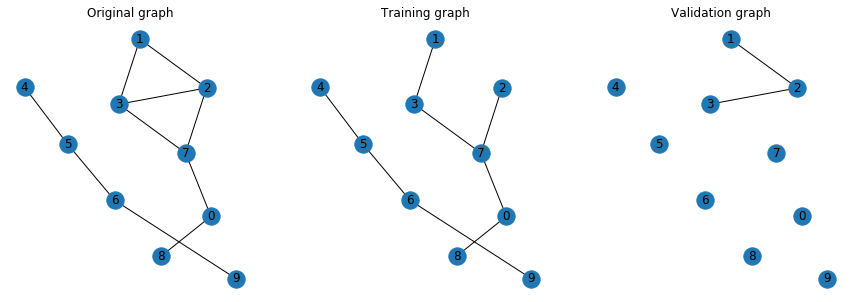

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("Original graph")
nx.draw(nx_original, positions, ax=axes[0], with_labels=True)
axes[1].set_title("Training graph")
nx.draw(nx_train, positions, ax=axes[1], with_labels=True)
axes[2].set_title("Validation graph")
nx.draw(nx_valid, positions, ax=axes[2], with_labels=True)
fig.savefig("holdouts.jpg")
plt.show()